You are given an integer n. There is an undirected graph with n nodes, numbered from 0 to n - 1. You are given a 2D integer array edges where edges[i] = [ai, bi] denotes that there exists an undirected edge connecting nodes ai and bi.

Return the number of pairs of different nodes that are unreachable from each other.

 

Example 1:

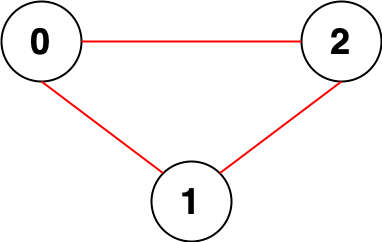

Input: n = 3, edges = [[0,1],[0,2],[1,2]]
Output: 0
Explanation: There are no pairs of nodes that are unreachable from each other. Therefore, we return 0.

Example 2:

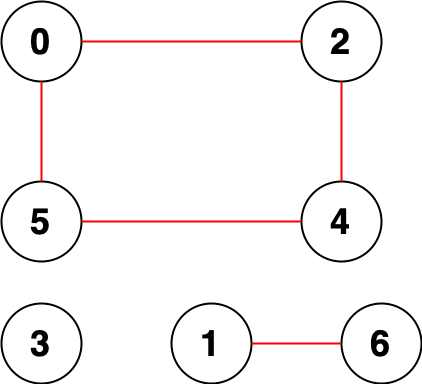

Input: n = 7, edges = [[0,2],[0,5],[2,4],[1,6],[5,4]]
Output: 14
Explanation: There are 14 pairs of nodes that are unreachable from each other:
[[0,1],[0,3],[0,6],[1,2],[1,3],[1,4],[1,5],[2,3],[2,6],[3,4],[3,5],[3,6],[4,6],[5,6]].
Therefore, we return 14.
 

Constraints:

1 <= n <= 105
0 <= edges.length <= 2 * 105
edges[i].length == 2
0 <= ai, bi < n
ai != bi
There are no repeated edges.

In [ ]:
class Solution:
    def dfs(self, node: int, parent: int) -> None:
        self.visited[node] = True
        self.groups[parent] += 1
        for nxt in self.graph[node]:
            if not self.visited[nxt]:
                self.dfs(nxt, parent)

    def countPairs(self, n: int, edges: List[List[int]]) -> int:
        self.groups = defaultdict(int)

        self.graph = defaultdict(list)
        for u, v in edges:
            self.graph[u].append(v)
            self.graph[v].append(u)

        self.visited = [False for _ in range(n)]

        for node in range(n):
            if not self.visited[node]:
                self.dfs(node, node)
        
        ans = 0
        groups = [v for v in self.groups.values() if v != 0]
        for i in range(len(groups) - 1):
            for j in range(i + 1, len(groups)):
                ans += groups[i] * groups[j]

        return ans


In [8]:
from typing import List
from collections import defaultdict
from itertools import combinations

class Solution:
    def countPairs(self, n: int, edges: List[List[int]]) -> int:
        graph = defaultdict(set)
        for u, v in edges:
            graph[u].add(v)
            graph[v].add(u)

        visited = [False for _ in range(n)]
        
        def dfs(node):
            if visited[node]:
                return 0
            else:
                ans = 1
                visited[node] = True
                for nxt in graph[node]:
                    ans += dfs(nxt)
                return ans

        groups = []
        for node in range(n):
            res = dfs(node)
            if res > 0:
                groups.append(res)
        
        if len(groups) == 0:
            return 0
        
        # return sum(i * j for i, j in combinations(groups, 2))
        
        ans = n * (n - 1) // 2
        for k in groups:
            ans -= k * (k - 1) // 2
        return ans